# 分组计算
* Apply
* Transform
* Filter

In [12]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', '{:,.1f}'.format)


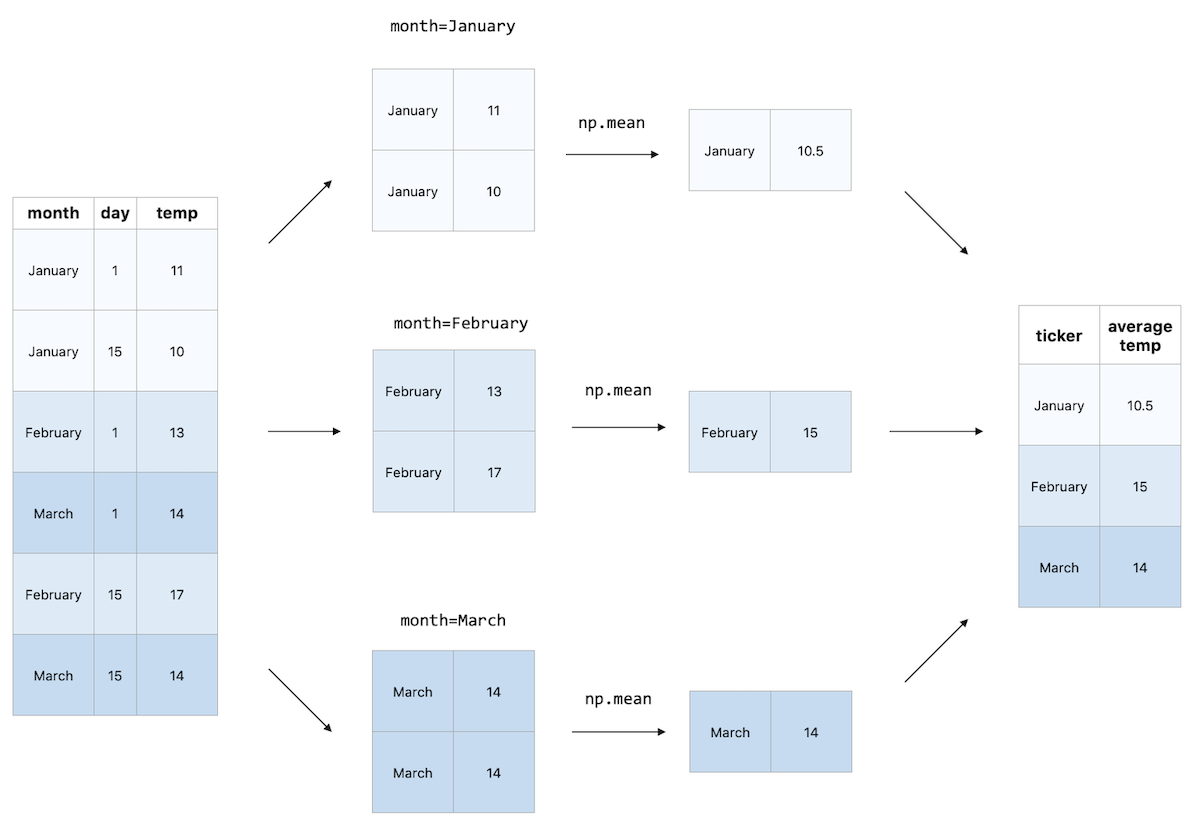

In [20]:
from IPython.display import Image
Image('groupby.png')

In [21]:
dat=pd.read_csv('./data/weather-6m.csv')

In [22]:
dat.head()

,year,month,day,hour,air_temp,dew_point,wind_speed
0,2009,1,1,1,-133.0,-167.0,15.0
1,2009,1,1,2,-133.0,-161.0,26.0
2,2009,1,1,3,-122.0,-156.0,0.0
3,2009,1,1,4,-117.0,-150.0,0.0
4,2009,1,1,5,-111.0,-150.0,15.0


In [23]:
dat.shape

(4340, 7)

## Apply
* Lambda - 一个group返回一个值
* Lambda - 一个group返回多个值
* 自定义操作

### Lambda - 一个group返回一个值

In [24]:
grp=dat.groupby(['month'])

In [25]:
for key,dat_df in grp:
    print('key:'+str(key))
    print(dat_df.head(10))

key:1
   year  month  day  hour  air_temp  dew_point  wind_speed
0  2009      1    1     1    -133.0     -167.0        15.0
1  2009      1    1     2    -133.0     -161.0        26.0
2  2009      1    1     3    -122.0     -156.0         0.0
3  2009      1    1     4    -117.0     -150.0         0.0
4  2009      1    1     5    -111.0     -150.0        15.0
5  2009      1    1     6       nan        nan         nan
6  2009      1    1     7     -94.0     -144.0        31.0
7  2009      1    1     8     -89.0     -139.0        31.0
8  2009      1    1     9     -83.0     -139.0        41.0
9  2009      1    1    10     -78.0     -139.0        57.0
key:2
     year  month  day  hour  air_temp  dew_point  wind_speed
743  2009      2    1     0      28.0      -17.0        82.0
744  2009      2    1     1      28.0      -17.0        82.0
745  2009      2    1     2      33.0      -11.0        93.0
746  2009      2    1     3      28.0      -11.0        77.0
747  2009      2    1     4      2

In [29]:
dat.groupby(['month'])[['wind_speed']].apply(lambda x:x.max()/x.std())

,wind_speed
month,
1,5.5
2,5.2
3,5.3
4,5.4
5,7.5
6,5.6


In [31]:
grp[['air_temp']].apply(lambda x:x.sum()/x.max())

,air_temp
month,
1,"-2,544.8"
2,-126.7
3,65.7
4,171.6
5,352.2
6,373.1


In [32]:
grp['air_temp'].agg(['min','max','sum'])

,min,max,sum
month,,,
1,-294.0,28.0,"-71,254.0"
2,-194.0,150.0,"-19,007.0"
3,-133.0,228.0,"14,987.0"
4,-28.0,283.0,"48,553.0"
5,11.0,283.0,"99,659.0"
6,33.0,333.0,"124,248.0"


### Lambda - 一个group返回多个值

In [59]:
grp['wind_speed'].apply(lambda x:pd.DataFrame([[x.sum()/x.max()],[x.max()/x.std()]],index=['sum/max','max/std'],columns=['column']).T).reset_index().drop(['level_1'],axis=1)

,month,sum/max,max/std
0,1,258.2,5.5
1,2,236.4,5.2
2,3,213.9,5.3
3,4,255.2,5.4
4,5,184.1,7.5
5,6,181.4,5.6


In [ ]:
[[SUM/MAX],
[MAX/STD]]

In [62]:
grp[['wind_speed']].apply(lambda x:x.quantile([0.1,0.5,1]))

wind_speed
month                
1     0.1        15.0
      0.5        41.0
      1.0       118.0
2     0.1        21.0
      0.5        46.0
      1.0       129.0
3     0.1        15.0
      0.5        41.0
      1.0       149.0
4     0.1        21.0
      0.5        46.0
      1.0       134.0
5     0.1        15.0
      0.5        41.0
      1.0       165.0
6     0.1         0.0
      0.5        31.0
      1.0       124.0

In [63]:
grp.apply(lambda x:x['wind_speed'].quantile([0.1,0.5,1]))

wind_speed,0.1,0.5,1.0
month,,,
1,15.0,41.0,118.0
2,21.0,46.0,129.0
3,15.0,41.0,149.0
4,21.0,46.0,134.0
5,15.0,41.0,165.0
6,0.0,31.0,124.0


In [66]:
grp.apply(lambda x:pd.Series([x['wind_speed'].max()/x['wind_speed'].std(),x['wind_speed'].sum()/x['wind_speed'].max()],index=['max/std','sum/max']))

,max/std,sum/max
month,,
1,5.5,258.2
2,5.2,236.4
3,5.3,213.9
4,5.4,255.2
5,7.5,184.1
6,5.6,181.4


### 自定义操作

In [ ]:
lambda x:xiloc[x['wind_speed'].idxmax()]['hour'],...

In [83]:
def fun(data):
    idx1=data[['air_temp','wind_speed']].idxmax()
    #print(idx1)
    idx2=data['dew_point'].idxmin()
    l=data.loc[idx1]['hour'].values.tolist()
    l.append(data.loc[idx2]['hour'])
    return pd.Series(l,index=['air','wind','dew']).T

In [84]:
dat.groupby(['month','day']).apply(lambda x:fun(x))

air  wind  dew
month day                
1     1   22.0  18.0  1.0
      2    0.0  12.0 21.0
      3   23.0  21.0  3.0
      4    3.0   0.0 23.0
      5   20.0   0.0  8.0
...        ...   ...  ...
6     26  17.0  18.0 23.0
      27  17.0   0.0  7.0
      28  19.0  19.0 18.0
      29   0.0  18.0  0.0
      30   0.0   0.0 16.0

[181 rows x 3 columns]

In [85]:
dat.groupby(['month','day']).apply(fun)

air  wind  dew
month day                
1     1   22.0  18.0  1.0
      2    0.0  12.0 21.0
      3   23.0  21.0  3.0
      4    3.0   0.0 23.0
      5   20.0   0.0  8.0
...        ...   ...  ...
6     26  17.0  18.0 23.0
      27  17.0   0.0  7.0
      28  19.0  19.0 18.0
      29   0.0  18.0  0.0
      30   0.0   0.0 16.0

[181 rows x 3 columns]

## Transform

In [87]:
grp['wind_speed'].apply(np.mean)

month
1   42.8
2   48.0
3   44.7
4   49.5
5   42.6
6   32.7
Name: wind_speed, dtype: float64

In [91]:
dat['wind_monthly_mean']=grp['wind_speed'].transform(np.mean)
dat

,year,month,day,hour,air_temp,dew_point,wind_speed,wind_monthly_mean
0,2009,1,1,1,-133.0,-167.0,15.0,42.8
1,2009,1,1,2,-133.0,-161.0,26.0,42.8
2,2009,1,1,3,-122.0,-156.0,0.0,42.8
3,2009,1,1,4,-117.0,-150.0,0.0,42.8
4,2009,1,1,5,-111.0,-150.0,15.0,42.8
...,...,...,...,...,...,...,...,...
4335,2009,6,30,19,178.0,111.0,41.0,32.7
4336,2009,6,30,20,189.0,117.0,46.0,32.7
4337,2009,6,30,21,183.0,111.0,36.0,32.7
4338,2009,6,30,22,189.0,111.0,46.0,32.7


In [89]:
dat.shape

(4340, 7)

In [90]:
dat.head()

,year,month,day,hour,air_temp,dew_point,wind_speed
0,2009,1,1,1,-133.0,-167.0,15.0
1,2009,1,1,2,-133.0,-161.0,26.0
2,2009,1,1,3,-122.0,-156.0,0.0
3,2009,1,1,4,-117.0,-150.0,0.0
4,2009,1,1,5,-111.0,-150.0,15.0


In [93]:
dat['month'].map(grp['wind_speed'].apply(np.mean))

0      42.8
1      42.8
2      42.8
3      42.8
4      42.8
       ... 
4335   32.7
4336   32.7
4337   32.7
4338   32.7
4339   32.7
Name: month, Length: 4340, dtype: float64

In [94]:
grp['wind_speed'].transform(np.mean)

0      42.8
1      42.8
2      42.8
3      42.8
4      42.8
       ... 
4335   32.7
4336   32.7
4337   32.7
4338   32.7
4339   32.7
Name: wind_speed, Length: 4340, dtype: float64

## Filter

In [96]:
dat.groupby(['month']).filter(lambda x:x['air_temp'].min()>=0)

,year,month,day,hour,air_temp,dew_point,wind_speed,wind_monthly_mean
2879,2009,5,1,0,161.0,133.0,26.0,42.6
2880,2009,5,1,1,150.0,133.0,41.0,42.6
2881,2009,5,1,2,150.0,133.0,36.0,42.6
2882,2009,5,1,3,161.0,139.0,62.0,42.6
2883,2009,5,1,4,156.0,133.0,46.0,42.6
...,...,...,...,...,...,...,...,...
4335,2009,6,30,19,178.0,111.0,41.0,32.7
4336,2009,6,30,20,189.0,117.0,46.0,32.7
4337,2009,6,30,21,183.0,111.0,36.0,32.7
4338,2009,6,30,22,189.0,111.0,46.0,32.7


In [99]:
grp['wind_speed'].min()

month
1   0.0
2   0.0
3   0.0
4   0.0
5   0.0
6   0.0
Name: wind_speed, dtype: float64

In [100]:
dat.groupby(['month','day']).filter(lambda x:x['wind_speed'].max()>100)

,year,month,day,hour,air_temp,dew_point,wind_speed,wind_monthly_mean
23,2009,1,2,0,-17.0,-67.0,46.0,42.8
24,2009,1,2,1,-17.0,-67.0,46.0,42.8
25,2009,1,2,2,-17.0,-67.0,67.0,42.8
26,2009,1,2,3,-22.0,-67.0,67.0,42.8
27,2009,1,2,4,-28.0,-67.0,57.0,42.8
...,...,...,...,...,...,...,...,...
4287,2009,6,28,19,267.0,106.0,124.0,32.7
4288,2009,6,28,20,267.0,106.0,98.0,32.7
4289,2009,6,28,21,267.0,106.0,72.0,32.7
4290,2009,6,28,22,261.0,94.0,93.0,32.7


In [101]:
dat.shape

(4340, 8)

In [102]:
dat.groupby(['month']).filter(lambda x:31 in x['day'].unique())

,year,month,day,hour,air_temp,dew_point,wind_speed,wind_monthly_mean
0,2009,1,1,1,-133.0,-167.0,15.0,42.8
1,2009,1,1,2,-133.0,-161.0,26.0,42.8
2,2009,1,1,3,-122.0,-156.0,0.0,42.8
3,2009,1,1,4,-117.0,-150.0,0.0,42.8
4,2009,1,1,5,-111.0,-150.0,15.0,42.8
...,...,...,...,...,...,...,...,...
3618,2009,5,31,19,161.0,83.0,51.0,42.6
3619,2009,5,31,20,161.0,72.0,57.0,42.6
3620,2009,5,31,21,156.0,33.0,57.0,42.6
3621,2009,5,31,22,150.0,17.0,57.0,42.6


In [103]:
dat.groupby(['month']).filter(lambda x:31 in x['day'].unique())['month'].unique()

array([1, 3, 5], dtype=int64)

## 课后练习

In [25]:
dat = pd.read_csv('./data/weather-6m.csv')

计算每个air_temp 基于每月平均值的zscore

随机选取50个数据，运用随机产生的数据，对每个月计算，数据量在每天的分布， 比如 10%的数据在第一天采集到

在dat数据基础上，重新生成一个代表每天air_temp平均值的column,命名为daily_air_temp

在dat中去掉每日最大air_temp 小于10的日子